<a href="https://colab.research.google.com/github/Muskanateeq/Machine-Learning-Loan-Prediction-Model/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import gdown

In [ ]:
dataset = '1Q-2W1uHfBVGN18_S1ogYH11cFMENlx7v'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/content/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Q-2W1uHfBVGN18_S1ogYH11cFMENlx7v
To: /content/dataset.csv
100%|██████████| 206k/206k [00:00<00:00, 34.7MB/s]


'/content/dataset.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df = pd.read_csv(output_path)
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP.Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal.Loan,int64


In [ ]:
columns_to_drop = ['ID','ZIP.Code', 'CCAvg', 'Mortgage']
df.drop(columns_to_drop, axis=1, inplace=True)
df

,Age,Experience,Income,Family,Education,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1,0,1,0,0,0
1,45,19,34,3,1,0,1,0,0,0
2,39,15,11,1,1,0,0,0,0,0
3,35,9,100,1,2,0,0,0,0,0
4,35,8,45,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,3,0,0,0,1,0
4996,30,4,15,4,1,0,0,0,1,0
4997,63,39,24,2,3,0,0,0,0,0
4998,65,40,49,3,2,0,0,0,1,0


In [ ]:
# prompt: change multiple couumns values from 0 to no and 1 to yes

# Define the columns to modify
columns_to_modify = ['Personal.Loan'] # Replace with your actual column names

# Iterate through the specified columns and replace values
for col in columns_to_modify:
    if col in df.columns:
        df[col] = df[col].replace({0: 'no', 1: 'yes'})
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Display the modified DataFrame (optional)
df

,Age,Experience,Income,Family,Education,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1,no,1,0,0,0
1,45,19,34,3,1,no,1,0,0,0
2,39,15,11,1,1,no,0,0,0,0
3,35,9,100,1,2,no,0,0,0,0
4,35,8,45,4,2,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,3,no,0,0,1,0
4996,30,4,15,4,1,no,0,0,1,0
4997,63,39,24,2,3,no,0,0,0,0
4998,65,40,49,3,2,no,0,0,1,0


In [ ]:
# Assuming 'Income' column exists and contains numeric values
if 'Income' in df.columns:
    # Convert 'Income' column to string type
    df['Income'] = df['Income'].astype(str)
    # Add triple zeros to the end of each value in the 'Income' column
    df['Income'] = df['Income'] + '000'
    # Convert 'Income' column back to numeric type if needed
    # df['Income'] = pd.to_numeric(df['Income'])
else:
    print("Income column not found in DataFrame.")

In [ ]:
df

,Age,Experience,Income,Family,Education,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49000,4,1,no,1,0,0,0
1,45,19,34000,3,1,no,1,0,0,0
2,39,15,11000,1,1,no,0,0,0,0
3,35,9,100000,1,2,no,0,0,0,0
4,35,8,45000,4,2,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40000,1,3,no,0,0,1,0
4996,30,4,15000,4,1,no,0,0,1,0
4997,63,39,24000,2,3,no,0,0,0,0
4998,65,40,49000,3,2,no,0,0,1,0


In [ ]:
print(df['target'].unique())

['no' 'yes']


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Age,Experience,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard
1840,55,25,23000,4,3,0,0,0,0
2115,57,31,30000,3,1,0,0,0,0
4437,63,38,63000,2,1,0,0,1,0
1146,31,7,71000,1,1,1,0,0,0
2486,61,36,130000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4426,33,8,140000,1,1,0,0,1,0
466,25,0,13000,2,3,0,0,1,0
3092,43,18,113000,2,1,1,0,0,0
3772,35,10,152000,2,1,0,0,1,0


In [ ]:
y_train

,target
1840,no
2115,no
4437,no
1146,no
2486,no
...,...
4426,no
466,no
3092,no
3772,no


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

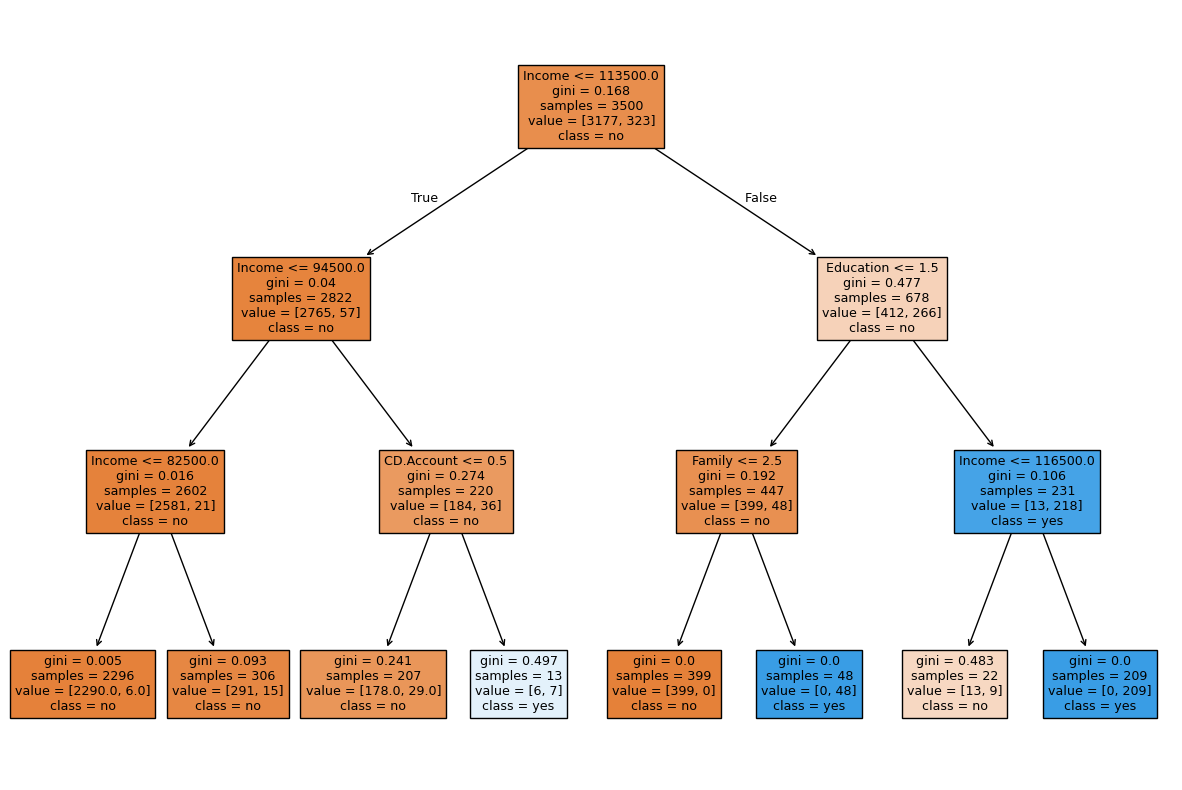

In [ ]:
# prompt:  show decision tree of model

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

In [ ]:
X_test

,Age,Experience,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard
1501,30,4,35000,2,2,1,0,0,1
2586,47,23,149000,4,1,0,0,0,1
2653,30,5,121000,2,1,0,0,1,0
1055,31,6,62000,1,1,1,0,1,0
705,62,36,30000,3,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...
3563,53,27,139000,1,3,0,0,0,0
1538,55,30,34000,4,3,0,0,1,0
1837,43,18,103000,3,1,0,0,1,1
2380,40,16,50000,2,3,0,0,0,0


In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['no', 'yes', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [ ]:
y_test

,target
1501,no
2586,yes
2653,no
1055,no
705,no
...,...
3563,yes
1538,no
1837,no
2380,no


In [ ]:
# prompt: calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.978


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      1.00      0.99      1343
         yes       0.96      0.83      0.89       157

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500

[[1337    6]
 [  27  130]]


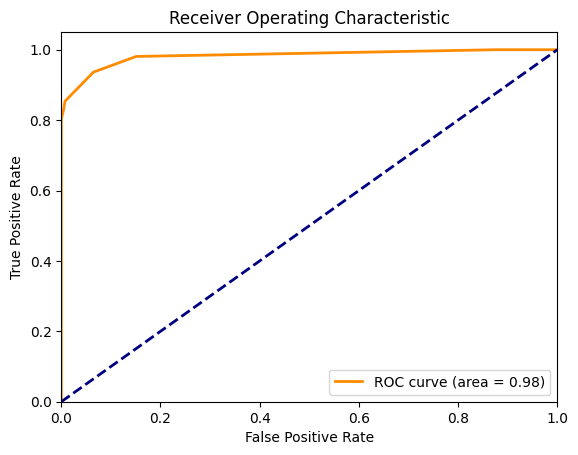

In [ ]:
# prompt: plot roc curve

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_prob are defined
# If y_pred_prob is not probability, calculate it
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: test model with my data for single sample with 9 features values

# Assuming 'X' is your feature matrix and 'model' is your trained model
# Create a sample with 9 features. Replace these with your actual values.
new_sample = pd.DataFrame({
    'Age': [30],
    'Experience': [10],
    'Income': ['150000'],
    'Family': [2],
    'Education': [2],
    'Securities.Account': [0],
    'CD.Account': [0],
    'Online': [0],
    'CreditCard': [1]
})

# Make the prediction
prediction = model.predict(new_sample)
print(f"Prediction for the loan approved: {prediction[0]}")

# You can also get the probabilities
probabilities = model.predict_proba(new_sample)
print(f"Prediction probabilities for the loan approved: {probabilities}")

Prediction for the new sample: yes
Prediction probabilities for the new sample: [[0. 1.]]
